In [ ]:
import pandas as pd
from google.colab import drive
df= pd.read_csv('/content/drive/MyDrive/iris.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [ ]:
print(df.describe)
print(df.info)

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>
<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0           

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.size)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
3
750


In [ ]:
from sklearn.datasets import load_iris
Iris=load_iris()
X=Iris.data
y=Iris.target

In [ ]:
print("First 5 rows of dataset:")
print(df.head())
print("\nTarget names:", Iris.target_names)
print("Dataset shape:", df.shape)


First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Target names: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 5)


In [ ]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=Iris.feature_names)
df['target'] = y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 105
Testing set size: 45


In [ ]:
# Create Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully")


✅ Decision Tree model trained successfully


In [ ]:
# Predictions
y_pred = dt_model.predict(X_test)
print("Sample Predictions:", y_pred[:10])
print("Actual Labels:    ", y_test[:10])


Sample Predictions: [2 1 2 1 2 2 1 1 0 2]
Actual Labels:     [2 1 2 1 2 2 1 1 0 2]



✅ Accuracy of Decision Tree model: 0.9777777777777777

📌 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


📊 Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


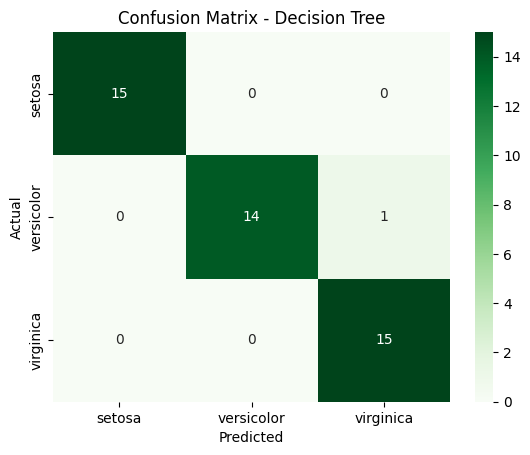

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy of Decision Tree model:", accuracy)

print("\n📌 Classification Report:\n", classification_report(y_test, y_pred, target_names=Iris.target_names))

cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", cm)

# Heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",
            xticklabels=Iris.target_names,
            yticklabels=Iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


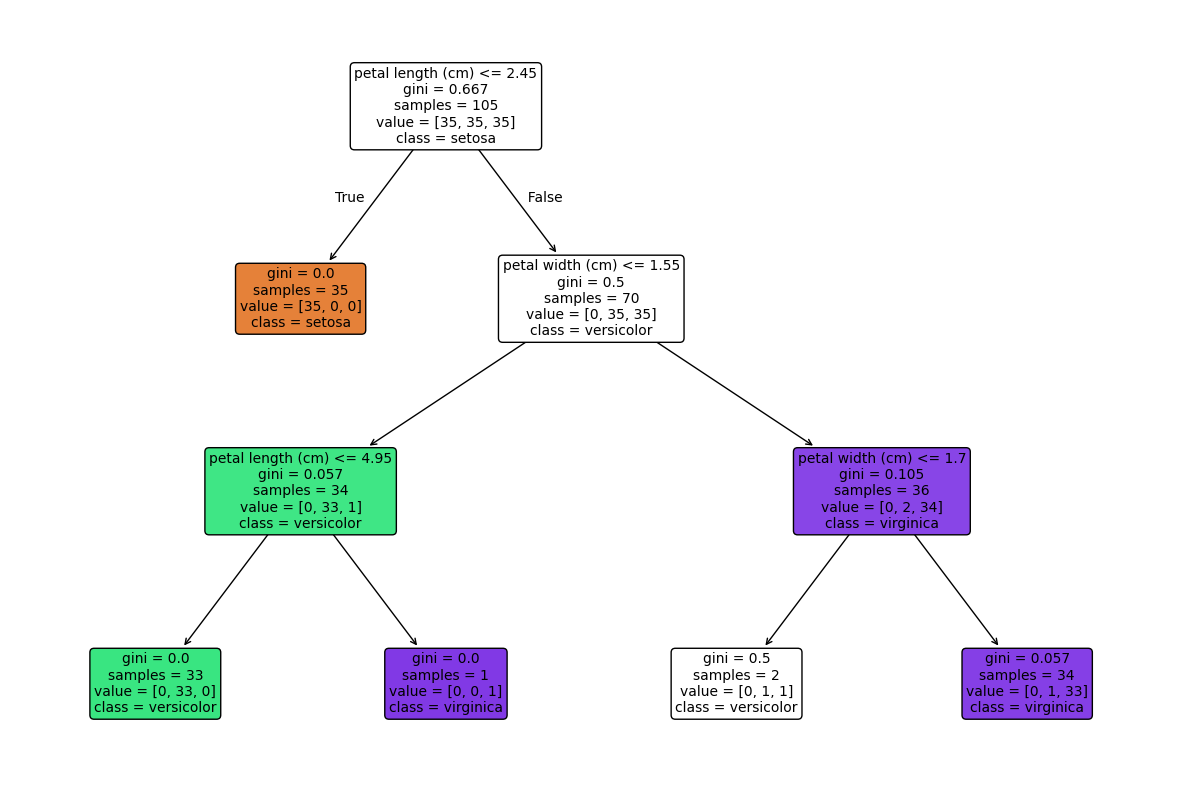

In [ ]:
# Plot the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    feature_names=Iris.feature_names,
    class_names=Iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
